In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.5 MB/s eta 0:00:00
   ━━

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [28]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT/Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [29]:
df.shape

(366, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [32]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [33]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [34]:
df.rename(str.strip,
          axis='columns',
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [35]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

0

In [36]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


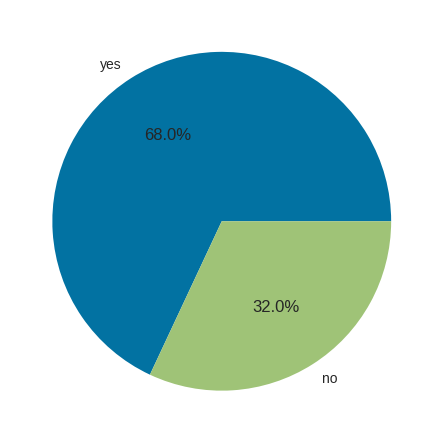

In [37]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [38]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [39]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


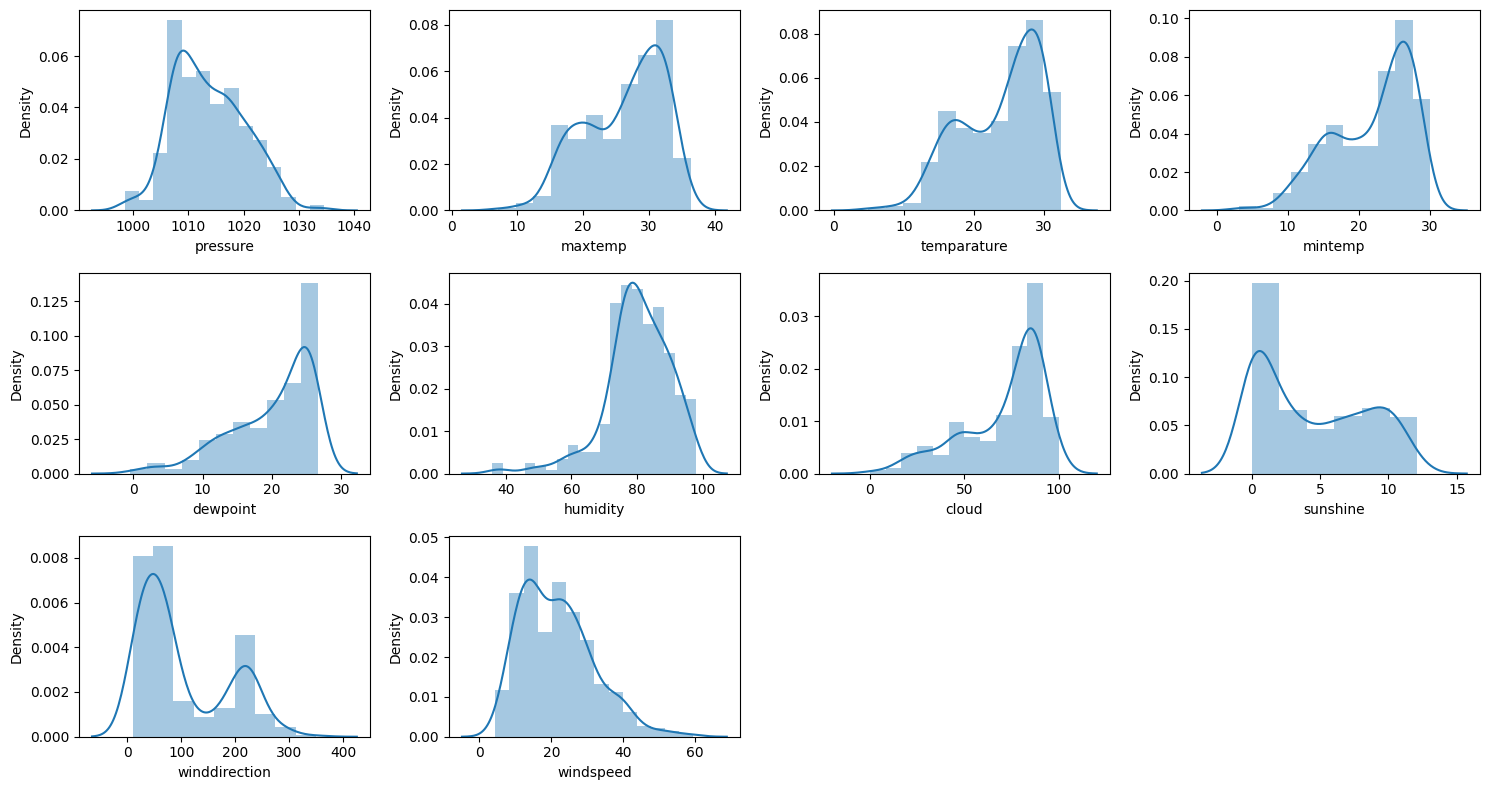

In [ ]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

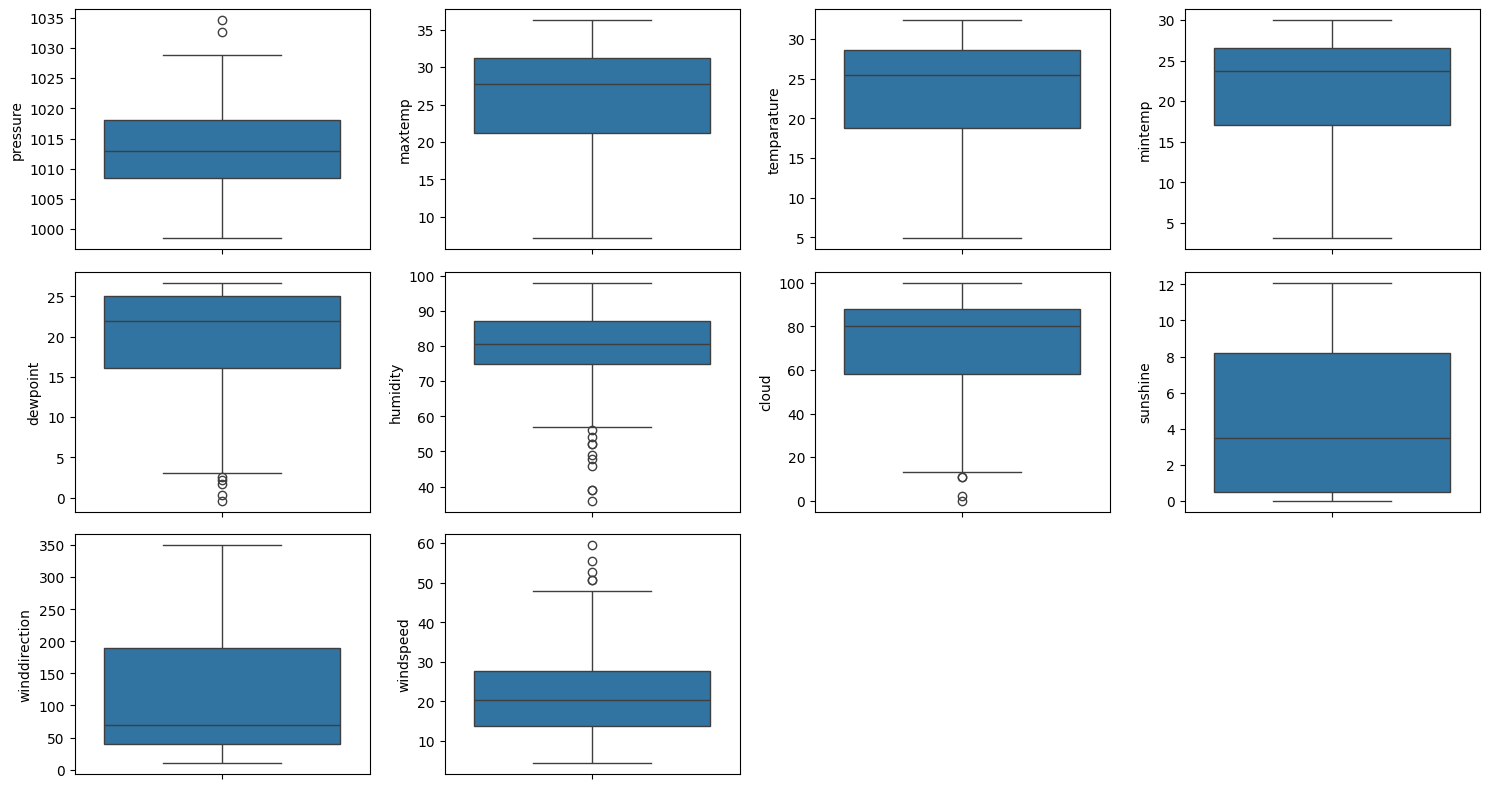

In [ ]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [40]:
df.replace({'yes':1, 'no':0}, inplace=True)

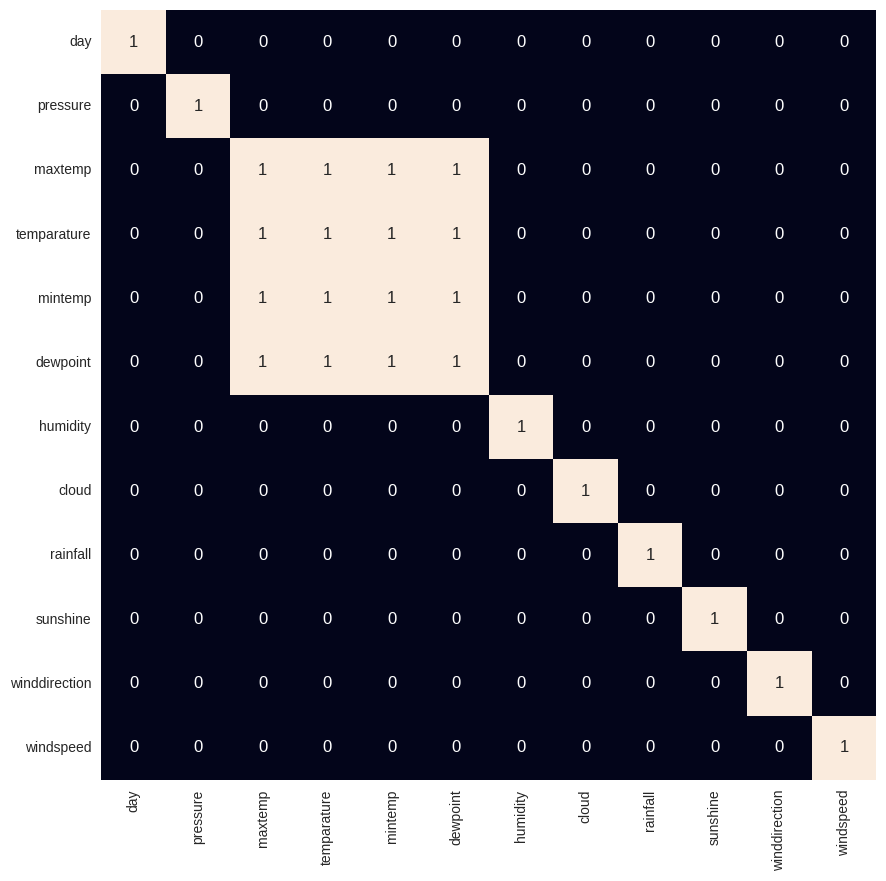

In [41]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [42]:
df.drop(['maxtemp', 'mintemp','day'], axis=1, inplace=True)

In [43]:
features = df.drop(['rainfall'], axis=1)
target = df.rainfall

In [44]:
X_train, X_val, Y_train, Y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [45]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [77]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'rainfall', train_size=0.8)

,Description,Value
0,Session id,1982
1,Target,rainfall
2,Target type,Binary
3,Original data shape,"(366, 9)"
4,Transformed data shape,"(366, 9)"
5,Transformed train set shape,"(292, 9)"
6,Transformed test set shape,"(74, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [78]:
cf=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8151,0.8824,0.9092,0.8400,0.8712,0.5429,0.5542,0.0530
ridge,Ridge Classifier,0.8116,0.8824,0.9092,0.8355,0.8691,0.5336,0.5448,0.0350
nb,Naive Bayes,0.8114,0.8763,0.8539,0.8743,0.8619,0.5618,0.5687,0.0310
rf,Random Forest Classifier,0.8079,0.8777,0.8792,0.8520,0.8629,0.5399,0.5487,0.2150
lr,Logistic Regression,0.8013,0.8800,0.8892,0.8372,0.8603,0.5153,0.5243,0.8080
gbc,Gradient Boosting Classifier,0.7944,0.8493,0.8742,0.8380,0.8532,0.5078,0.5180,0.1900
et,Extra Trees Classifier,0.7943,0.8758,0.8795,0.8356,0.8537,0.5049,0.5183,0.3070
qda,Quadratic Discriminant Analysis,0.7909,0.8327,0.8892,0.8274,0.8541,0.4861,0.5009,0.0320
ada,Ada Boost Classifier,0.7840,0.8341,0.8592,0.8374,0.8454,0.4848,0.4921,0.1290
knn,K Neighbors Classifier,0.7802,0.8111,0.8995,0.8084,0.8492,0.4439,0.4571,0.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

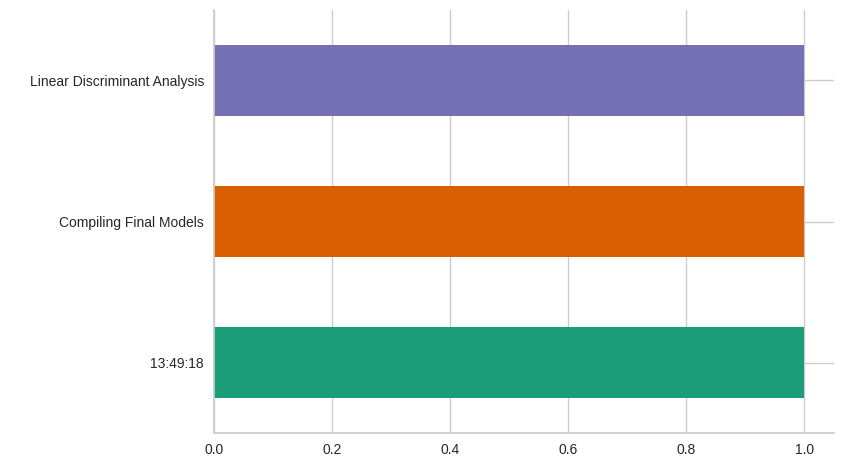

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(X_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8893967324057473
Validation Accuracy :  0.8966666666666667

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.8391666666666666

SVC(probability=True) : 
Training Accuracy :  0.9

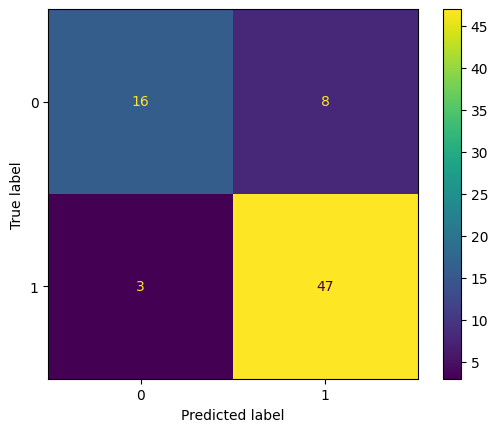

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
ConfusionMatrixDisplay.from_estimator(models[2], X_val, Y_val)
plt.show()

In [ ]:
print(metrics.classification_report(Y_val,
                                    models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74



Logistic Regression : 
Training Accuracy :  0.8893209767430116
Validation Accuracy :  0.8966666666666667

XGBoost : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.8391666666666666

SVC : 
Training Accuracy :  0.9026413474407211
Validation Accuracy :  0.8858333333333333

LDA : 
Training Accuracy :  0.8846998813161283
Validation Accuracy :  0.9066666666666667



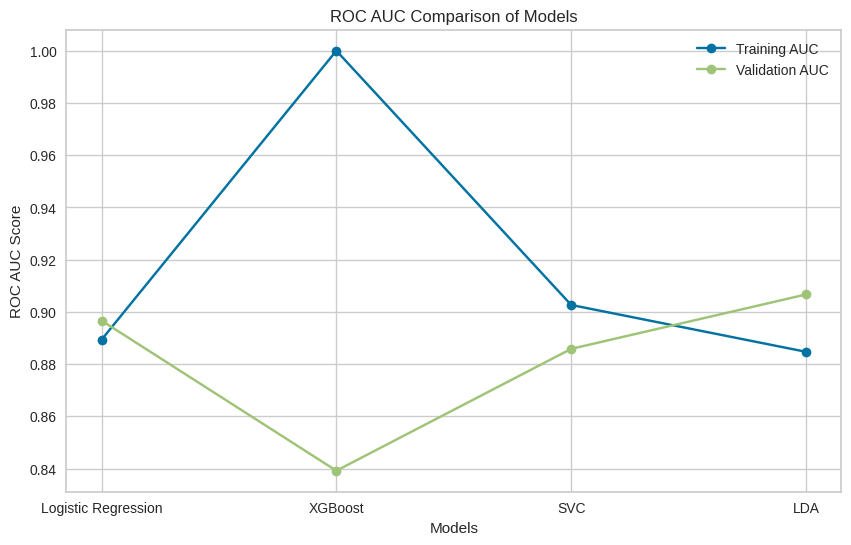

In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

# Add LDA to the models list
models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf', probability=True),
    LinearDiscriminantAnalysis()
]

train_auc = []
val_auc = []
model_names = ['Logistic Regression', 'XGBoost', 'SVC', 'LDA']

for i in range(len(models)):
    models[i].fit(X, Y)

    print(f'{model_names[i]} : ')

    train_preds = models[i].predict_proba(X)
    train_auc_score = metrics.roc_auc_score(Y, train_preds[:,1])
    train_auc.append(train_auc_score)
    print('Training Accuracy : ', train_auc_score)

    val_preds = models[i].predict_proba(X_val)
    val_auc_score = metrics.roc_auc_score(Y_val, val_preds[:,1])
    val_auc.append(val_auc_score)
    print('Validation Accuracy : ', val_auc_score)
    print()

# Plot the ROC AUC scores
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_auc, label='Training AUC', marker='o')
plt.plot(model_names, val_auc, label='Validation AUC', marker='o')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Comparison of Models')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74



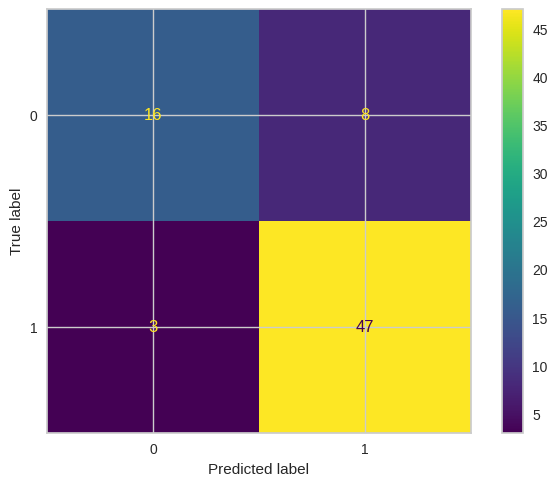

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
x=2
print(metrics.classification_report(Y_val,models[x].predict(X_val)))
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
ConfusionMatrixDisplay.from_estimator(models[x], X_val, Y_val)
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.87      0.92      0.89        50

    accuracy                           0.85        74
   macro avg       0.84      0.81      0.82        74
weighted avg       0.85      0.85      0.85        74



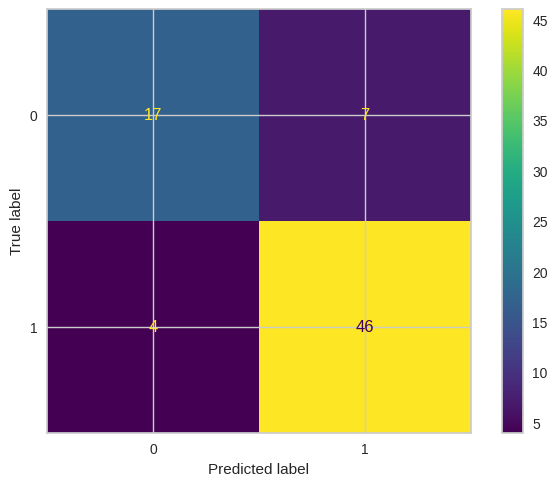

In [49]:
x=3
print(metrics.classification_report(Y_val,models[x].predict(X_val)))
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
ConfusionMatrixDisplay.from_estimator(models[x], X_val, Y_val)
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        24
           1       0.81      0.88      0.85        50

    accuracy                           0.78        74
   macro avg       0.76      0.73      0.74        74
weighted avg       0.78      0.78      0.78        74



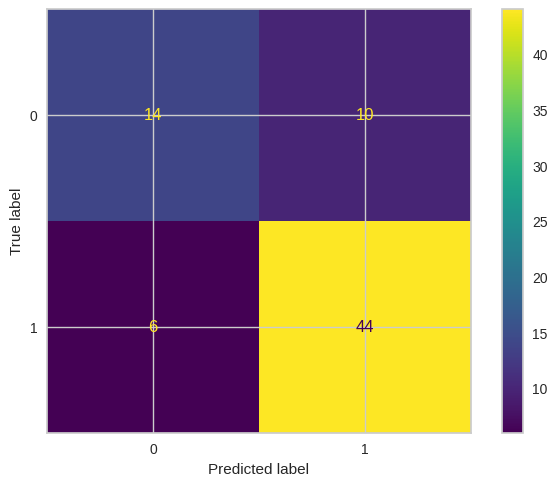

In [50]:
x=1
print(metrics.classification_report(Y_val,models[x].predict(X_val)))
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
ConfusionMatrixDisplay.from_estimator(models[x], X_val, Y_val)
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.88      0.90      0.89        50

    accuracy                           0.85        74
   macro avg       0.83      0.82      0.83        74
weighted avg       0.85      0.85      0.85        74



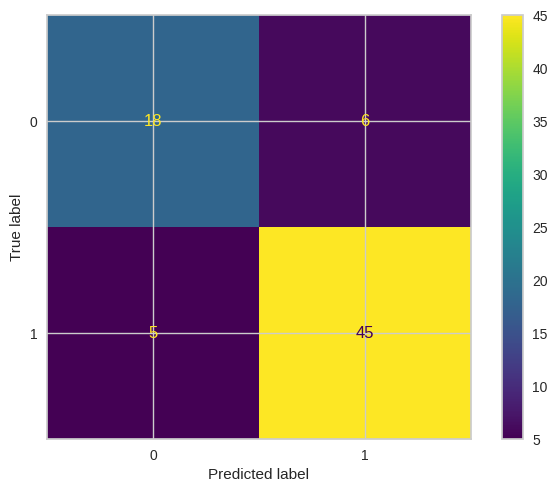

In [51]:
x=0
print(metrics.classification_report(Y_val,models[x].predict(X_val)))
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
ConfusionMatrixDisplay.from_estimator(models[x], X_val, Y_val)
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
lda = LinearDiscriminantAnalysis()

# Define hyperparameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto'],
    'priors': [None, [0.5, 0.5], [0.2, 0.8]]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [67]:
grid_search.fit(X, Y)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'priors': None, 'shrinkage': None, 'solver': 'svd'}
Best Cross-Validation Score: 0.7866772151898734


In [68]:
best_lda = grid_search.best_estimator_
Y_pred = best_lda.predict(X_val)
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
print(classification_report(Y_val, Y_pred))
print(confusion_matrix(Y_val, Y_pred))


              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.87      0.92      0.89        50

    accuracy                           0.85        74
   macro avg       0.84      0.81      0.82        74
weighted avg       0.85      0.85      0.85        74

[[17  7]
 [ 4 46]]


Best LDA Parameters: {'priors': None, 'shrinkage': None, 'solver': 'svd'}
LDA Training AUC :  0.8846998813161283
LDA Validation AUC :  0.9066666666666667


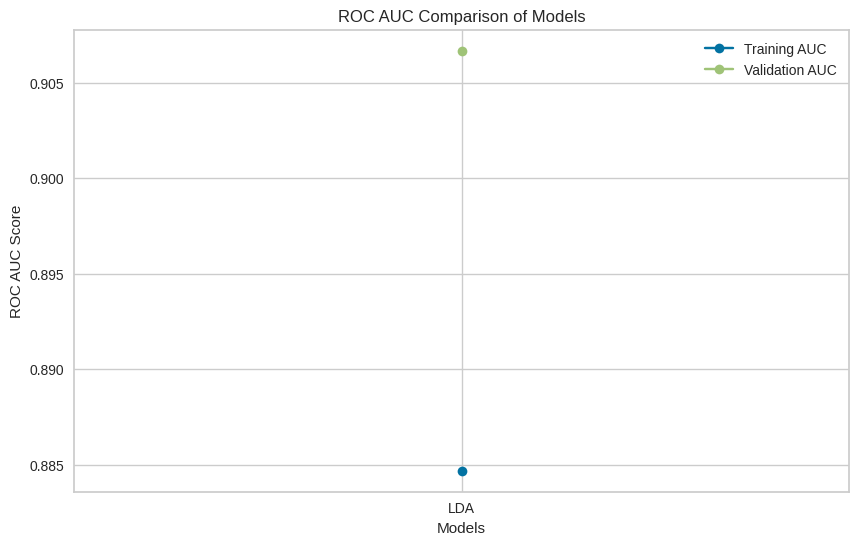

In [81]:
# Initialize the lists
train_auc = []
val_auc = []



# Now perform hyperparameter tuning for LDA
lda = LinearDiscriminantAnalysis()

# Define hyperparameter grid for LDA
param_grid = {
    'solver': ['svd'],
    'shrinkage': [None, 'auto'],
    'priors': [None, [0.5, 0.5], [0.2, 0.8]]
}

# Set up GridSearchCV for LDA
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, Y)

# Get the best model and evaluate
best_lda = grid_search.best_estimator_
print("Best LDA Parameters:", grid_search.best_params_)

# Predict and evaluate AUC for the best LDA model
lda_train_preds = best_lda.predict_proba(X)
lda_train_auc_score = metrics.roc_auc_score(Y, lda_train_preds[:, 1])
train_auc.append(lda_train_auc_score)
print('LDA Training AUC : ', lda_train_auc_score)

lda_val_preds = best_lda.predict_proba(X_val)
lda_val_auc_score = metrics.roc_auc_score(Y_val, lda_val_preds[:, 1])
val_auc.append(lda_val_auc_score)
print('LDA Validation AUC : ', lda_val_auc_score)

# Append LDA name to model_names
model_names=['LDA']



# Plot the ROC AUC scores
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_auc, label='Training AUC', marker='o')
plt.plot(model_names, val_auc, label='Validation AUC', marker='o')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Comparison of Models')
plt.legend()
plt.grid(True)
plt.show()


Best Parameters: {'priors': None, 'shrinkage': None, 'solver': 'svd'}
Best Cross-Validation Score: 0.8699807692307692
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.87      0.92      0.89        50

    accuracy                           0.85        74
   macro avg       0.84      0.81      0.82        74
weighted avg       0.85      0.85      0.85        74

[[17  7]
 [ 4 46]]


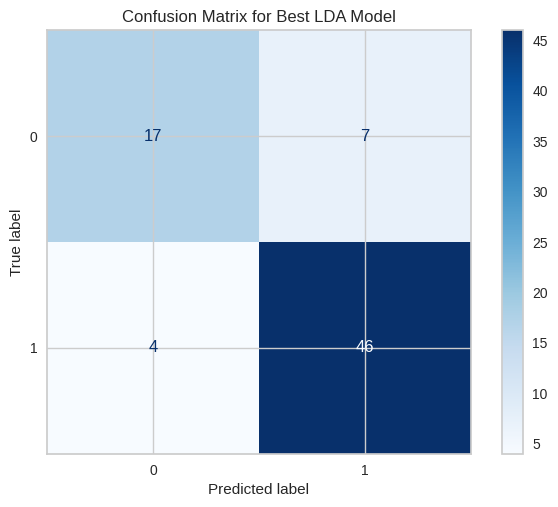

In [82]:
# Display the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predictions and evaluation on the validation set
Y_pred = best_lda.predict(X_val)

# Evaluate the model
print(classification_report(Y_val, Y_pred))
print(confusion_matrix(Y_val, Y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(best_lda, X_val, Y_val, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best LDA Model')
plt.show()

In [83]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from joblib import dump

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT/Rainfall.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Step 2: Preprocess the data
# Rename columns to remove leading/trailing whitespace
df.rename(str.strip, axis='columns', inplace=True)

# Fill missing values with column means
for col in df.columns:
    if df[col].isnull().sum() > 0:
        val = df[col].mean()
        df[col] = df[col].fillna(val)

# Replace categorical values with numerical ones
df.replace({'yes': 1, 'no': 0}, inplace=True)

# Drop unnecessary columns
df.drop(['maxtemp', 'mintemp', 'day'], axis=1, inplace=True)

# Step 3: Prepare features and target variable
features = df.drop(['rainfall'], axis=1)
target = df['rainfall']

# Step 4: Random Oversampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=22)
X_resampled, Y_resampled = ros.fit_resample(features, target)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 6: Train the LDA Model
best_params = {'priors': None, 'shrinkage': None, 'solver': 'svd'}
lda_model = LinearDiscriminantAnalysis(**best_params)
lda_model.fit(X_scaled, Y_resampled)

# Step 7: Save the trained model
dump(scaler, '/content/drive/MyDrive/Colab Notebooks/IoT/scaler.joblib')
dump(lda_model, '/content/drive/MyDrive/Colab Notebooks/IoT/best_lda_model.joblib')
print("Model saved as 'best_lda_model.joblib'")


   day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   cloud   \
0    1     1025.9     19.9         18.3     16.8      13.1         72      49   
1    2     1022.0     21.7         18.9     17.2      15.6         81      83   
2    3     1019.7     20.3         19.3     18.0      18.4         95      91   
3    4     1018.9     22.3         20.6     19.1      18.8         90      88   
4    5     1015.9     21.3         20.7     20.2      19.9         95      81   

  rainfall  sunshine           winddirection  windspeed  
0      yes       9.3                    80.0       26.3  
1      yes       0.6                    50.0       15.3  
2      yes       0.0                    40.0       14.2  
3      yes       1.0                    50.0       16.9  
4      yes       0.0                    40.0       13.7  
Model saved as 'best_lda_model.joblib'


In [85]:
df.columns

Index(['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'rainfall',
       'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import load
from sklearn import metrics

# Step 1: Load the saved model
lda_model = load('/content/drive/MyDrive/Colab Notebooks/IoT/best_lda_model.joblib')

# Step 2: Load the dataset for prediction (or use a new dataset)
df_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT/Rainfall.csv')

# Preprocess the new data (same steps as before)
df_new.rename(str.strip, axis='columns', inplace=True)

# Fill missing values
for col in df_new.columns:
    if df_new[col].isnull().sum() > 0:
        val = df_new[col].mean()
        df_new[col] = df_new[col].fillna(val)

# Replace categorical values with numerical ones (if applicable)
df_new.replace({'yes': 1, 'no': 0}, inplace=True)

# Drop unnecessary columns
df_new.drop(['maxtemp', 'mintemp', 'day'], axis=1, inplace=True)

# Step 3: Prepare features for prediction using specific inputs
features_new = df_new[['pressure', 'temperature', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']]

# Step 4: Feature Scaling
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(features_new)

# Step 5: Make predictions
predictions = lda_model.predict(X_new_scaled)

# Optional: If you have the true labels for evaluation
# Uncomment the following lines if you have true labels
# true_labels = df_new['rainfall']
# print(metrics.classification_report(true_labels, predictions))
# print(metrics.confusion_matrix(true_labels, predictions))

# Display predictions
df_new['Predicted_Rainfall'] = predictions
print(df_new[['Predicted_Rainfall']])


In [88]:
!pip install flask-cors


In [89]:
import os
import joblib
import pandas as pd
from flask import Flask, request, jsonify
from flask_cors import CORS
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)
CORS(app)

app.config['MODEL_FOLDER'] = './models'

# Load the trained LDA model
def load_trained_model():
    model = joblib.load(f"{app.config['MODEL_FOLDER']}/best_lda_model.joblib")
    return model

# Load the scaler used for feature scaling
def load_scaler():
    scaler = joblib.load(f"{app.config['MODEL_FOLDER']}/scaler.joblib")
    return scaler

# Route to make predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json

    # Extract data from the JSON payload
    temperature = data.get('temperature')
    humidity = data.get('humidity')
    pressure = data.get('pressure')
    dewPoint = data.get('dewPoint')
    cloud = data.get('cloud')
    windspeed = data.get('windspeed')
    winddirection = data.get('winddirection')
    sunshine = data.get('sunshine')

    # Check if any of the required fields are missing
    if any(v is None for v in [temperature, humidity, pressure, dewPoint, cloud, windspeed, winddirection, sunshine]):
        return jsonify({"error": "Missing one or more input values."}), 400

    # Prepare the features for prediction
    features = [[pressure, temperature, dewPoint, humidity, cloud, sunshine, winddirection, windspeed]]

    # Load the scaler and scale the features
    scaler = load_scaler()
    features_scaled = scaler.transform(features)

    # Load the model and make predictions
    model = load_trained_model()
    prediction = model.predict(features_scaled)

    # Return the prediction as a JSON response
    return jsonify({"Predicted_Rainfall": int(prediction[0])})  # Assuming the prediction is binary (0 or 1)

if __name__ == '__main__':
    # Ensure required directories exist
    os.makedirs(app.config['MODEL_FOLDER'], exist_ok=True)

    # Load the scaler for feature scaling
    scaler = StandardScaler()
    joblib.dump(scaler, f"{app.config['MODEL_FOLDER']}/scaler.joblib")  # Adjust if you need to save a trained scaler

    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
